In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import os
import json
from pandas.io.json import json_normalize
import pprint
# import ijson
import matplotlib.pyplot as plt
import string
import fnmatch
import glob

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk('C:/Users/trivikram.cheedella/OneDrive - JD Power/Data Science Data/CORD-19-research-challenge'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass

# for filename in fnmatch.filter(filenames, '*.txt'):
# Any results you write to the current directory are saved as output.

In [2]:
input = Path('C:/Users/trivikram.cheedella/OneDrive - JD Power/Data Science Data/CORD-19-research-challenge')
output = Path('C:/Users/trivikram.cheedella/OneDrive - JD Power/Data Science Data/CORD-19-research-challenge/output')

In [3]:
df_all_sources_metadata = pd.read_csv(input / 'metadata.csv')

In [4]:
print(df_all_sources_metadata.shape)
df_all_sources_metadata.info()

(44220, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44220 entries, 0 to 44219
Data columns (total 15 columns):
sha                            28462 non-null object
source_x                       44220 non-null object
title                          43996 non-null object
doi                            40750 non-null object
pmcid                          23319 non-null object
pubmed_id                      22943 non-null float64
license                        44220 non-null object
abstract                       35806 non-null object
publish_time                   34197 non-null object
authors                        41074 non-null object
journal                        33173 non-null object
Microsoft Academic Paper ID    964 non-null float64
WHO #Covidence                 1767 non-null object
has_full_text                  44220 non-null bool
full_text_file                 32829 non-null object
dtypes: bool(1), float64(2), object(12)
memory usage: 4.8+ MB


In [5]:
df_all_sources_metadata.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal,NaN,NaN,False,custom_license
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license
4,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license


In [6]:
%%time
all_json = glob.glob(f'{input}/**/*.json', recursive=True)
len(all_json)

Wall time: 468 ms


29315

In [7]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
            # Extend Here
            #
            #
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
first_row = FileReader(all_json[0])
print(first_row)

0015023cc06b5362d332b3baf348d11567ca2fbb: word count: 194 22 Text word count: 5168 23 24 25 author/funder. All rights reserved. No reuse allowed without permission. Abstract 27 The positive stranded RNA genomes of picornaviruses comprise a si... VP3, and VP0 (which is further processed to VP2 and VP4 during virus assembly) (6). The P2 64 and P3 regions encode the non-structural proteins 2B and 2C and 3A, 3B (1-3) (VPg), 3C pro and 4 structura...


In [8]:
%%time
dict_ = {'paper_id': [], 'abstract': [], 'body_text': []}
for idx, entry in enumerate(all_json):
    if idx % (len(all_json) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_json)}')
    content = FileReader(entry)
    dict_['paper_id'].append(content.paper_id)
    dict_['abstract'].append(content.abstract)
    dict_['body_text'].append(content.body_text)
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'abstract', 'body_text'])
df_covid.head()

Processing index: 0 of 29315
Processing index: 2931 of 29315
Processing index: 5862 of 29315
Processing index: 8793 of 29315
Processing index: 11724 of 29315
Processing index: 14655 of 29315
Processing index: 17586 of 29315
Processing index: 20517 of 29315
Processing index: 23448 of 29315
Processing index: 26379 of 29315
Processing index: 29310 of 29315
Wall time: 2min 18s


,paper_id,abstract,body_text
0,0015023cc06b5362d332b3baf348d11567ca2fbb,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP..."
1,004f0f8bb66cf446678dc13cf2701feec4f36d76,,The 2019-nCoV epidemic has spread across China...
2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by..."
3,0139ea4ca580af99b602c6435368e7fdbefacb03,Nipah Virus (NiV) came into limelight recently...,Nipah is an infectious negative-sense single-s...
4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Background: A novel coronavirus (2019-nCoV) em...,"In December 2019, a cluster of patients with p..."


In [9]:
dict_ = None

In [10]:
%%time
df_covid['abstract_word_count'] = df_covid['abstract'].apply(lambda x: len(x.strip().split()))
df_covid['body_word_count'] = df_covid['body_text'].apply(lambda x: len(x.strip().split()))
df_covid.head()

Wall time: 15.6 s


,paper_id,abstract,body_text,abstract_word_count,body_word_count
0,0015023cc06b5362d332b3baf348d11567ca2fbb,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP...",241,1728
1,004f0f8bb66cf446678dc13cf2701feec4f36d76,,The 2019-nCoV epidemic has spread across China...,0,755
2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by...",1647,4003
3,0139ea4ca580af99b602c6435368e7fdbefacb03,Nipah Virus (NiV) came into limelight recently...,Nipah is an infectious negative-sense single-s...,326,2399
4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Background: A novel coronavirus (2019-nCoV) em...,"In December 2019, a cluster of patients with p...",22,4642


In [11]:
%%time
df_covid['abstract'] = df_covid['abstract'].apply(lambda x: x.lower())
df_covid['body_text'] = df_covid['body_text'].apply(lambda x: x.lower())
df_covid.head()

Wall time: 11.4 s


,paper_id,abstract,body_text,abstract_word_count,body_word_count
0,0015023cc06b5362d332b3baf348d11567ca2fbb,word count: 194 22 text word count: 5168 23 24...,"vp3, and vp0 (which is further processed to vp...",241,1728
1,004f0f8bb66cf446678dc13cf2701feec4f36d76,,the 2019-ncov epidemic has spread across china...,0,755
2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,infectious bronchitis (ib) causes significant ...,"infectious bronchitis (ib), which is caused by...",1647,4003
3,0139ea4ca580af99b602c6435368e7fdbefacb03,nipah virus (niv) came into limelight recently...,nipah is an infectious negative-sense single-s...,326,2399
4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,background: a novel coronavirus (2019-ncov) em...,"in december 2019, a cluster of patients with p...",22,4642


In [12]:
df_covid.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
paper_id,29315,29315,d637af87051dab1ba5deec43872e03dc9f55c6b3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abstract,29315,21049,,8051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body_text,29315,29117,"in previous reports, workers have characterize...",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abstract_word_count,29315,NaN,NaN,NaN,164.501,175.353,0,0,161,240,4767
body_word_count,29315,NaN,NaN,NaN,4802.29,7322.71,1,2444,3730,5509.5,260378


In [13]:
df_covid.drop_duplicates(['body_text'], inplace=True)
df_covid.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
paper_id,29117,29117,d637af87051dab1ba5deec43872e03dc9f55c6b3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abstract,29117,21044,,8004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body_text,29117,29117,with the uncertainty about the possible extent...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abstract_word_count,29117,NaN,NaN,NaN,164.504,175.637,0,0,160,240,4767
body_word_count,29117,NaN,NaN,NaN,4811.94,7344.37,1,2450,3733,5513,260378


In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

In [15]:
lemmatizer = WordNetLemmatizer()

print(len(STOPWORDS))
print(len(stopwords.words('english')))

custom_stopwords = []
custom_stopwords = list(set(stopwords.words('english') + list(STOPWORDS))) + ['q']

print(len(custom_stopwords))

print(custom_stopwords)

190
179
226
["he'd", 'by', "let's", 'own', 'both', "i'd", 'which', 'no', "they've", "we'd", 'cannot', "he's", 'because', 'won', "mightn't", 'be', 't', 'it', "when's", 'can', 'that', 'after', 'any', 'also', 'where', 're', "i've", 'couldn', 'but', 'than', 'www', "hasn't", 'doing', 'myself', "doesn't", 'them', 'this', 'out', 'few', 'doesn', "he'll", 'com', "what's", 'y', 'herself', "it's", 'otherwise', 'ma', 'like', 'isn', 'before', 'does', "where's", 'of', 'all', 'when', "we're", 'very', 'had', "shan't", 'will', "wouldn't", 'his', "why's", 'ain', 'were', 'those', 'as', 'against', 'about', 'aren', 'has', 'to', 'so', 'themselves', 'too', 'll', 'hers', "they're", 'am', 'mightn', 'did', 'more', "mustn't", "there's", 'at', 'would', 'such', 'o', 'wasn', "she's", "haven't", 'who', 'further', "that's", 'down', 'on', 'else', 'i', "you'll", 'up', 'these', "should've", 'yourself', 'into', 'shall', 'don', "we'll", "how's", 'with', 'k', 'just', 'r', "here's", 'and', 'since', 'me', 'each', 'through', 

In [16]:
def remove_punc_stopword_tokens(tokens, tolower=False):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    remove_punc = [word for word in tokens if word not in string.punctuation]
    if tolower:
        return [word.lower() for word in remove_punc if word.lower() not in custom_stopwords]
    else:
        return [word for word in remove_punc if word not in custom_stopwords]

In [17]:
def remove_punc_stopword_text(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in custom_stopwords]

In [18]:
def clean_the_text(text):
        tokens = word_tokenize(text)
        remove_punc = [word for word in tokens if word not in string.punctuation]
        remove_stopwords = [word.lower() for word in remove_punc if word.lower() not in custom_stopwords]
        more_than_three = [w for w in remove_stopwords if len(w)>3]
        lem = [lemmatizer.lemmatize(w) for w in more_than_three]
        return ' '.join(lem)

# cleaned_text = clean_the_text("my name is TRIVIKRAM, and I am first born in my fam don't process processing patients")
# print(cleaned_text)

In [19]:
df_covid_for_nlp = df_covid.copy()

In [20]:
# %%time
# df_covid_for_nlp['clean_text'] = df_covid_for_nlp['body_text'].map(str.split, " ")

In [21]:
%%time
# df_covid_for_nlp['clean_text'] = df_covid_for_nlp['clean_text'].apply(lambda x: remove_punc_stopword_tokens(x, True))
# df_covid_for_nlp['clean_text'] = df_covid_for_nlp['clean_text'].apply(lambda x: ' '.join(remove_punc_stopword_tokens(x, True)))
# cleaned_text = df_covid_for_nlp['body_text'][:10].apply(lambda x: clean_the_text(x))
df_covid_for_nlp['cleaned_text'] = df_covid_for_nlp['body_text'].apply(lambda x: clean_the_text(x))
# print(cleaned_text[:20])

Wall time: 51min 5s


In [23]:
df_covid_for_nlp['cleaned_text'].head()

0    processed virus assembly region encode non-str...
1    2019-ncov epidemic spread across china country...
2    infectious bronchitis caused infectious bronch...
3    nipah infectious negative-sense single-strande...
4    december 2019 cluster patient pneumonia unknow...
Name: cleaned_text, dtype: object

In [29]:
# df_covid_for_nlp.to_csv('covid-19.csv')

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
                             max_features= 1000, # keep top 1000 terms 
                             max_df = 0.5, 
                             smooth_idf=True)

X = vectorizer.fit_transform(df_covid_for_nlp['cleaned_text'])

X.shape # check shape of the document-term matrix

(29117, 1000)

In [25]:
print(type(X))
pd.DataFrame(X).head()

<class 'scipy.sparse.csr.csr_matrix'>


,0
0,"(0, 3)\t0.014779302182319841\n (0, 138)\t0...."
1,"(0, 505)\t0.02621110464194465\n (0, 654)\t0..."
2,"(0, 587)\t0.006160651037168095\n (0, 44)\t0..."
3,"(0, 183)\t0.017436525157170424\n (0, 311)\t..."
4,"(0, 226)\t0.01313067107146961\n (0, 242)\t0..."


In [26]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

10

In [27]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
    print(" ")

Topic 0: 
gene
mouse
antibody
sequence
cov
influenza
sars
vaccine
expression
figure
 
Topic 1: 
hospital
outbreak
influenza
child
risk
public
care
country
mers
transmission
 
Topic 2: 
cov
mers
sars
sequence
preprint
residue
domain
bat
hcov
genome
 
Topic 3: 
sequence
genome
gene
primer
strain
nucleotide
structure
phylogenetic
sequencing
specie
 
Topic 4: 
strain
sequence
cat
child
pcr
vaccine
rt
mers
primer
calf
 
Topic 5: 
vaccine
mouse
animal
vaccination
strain
public
antibody
outbreak
country
antigen
 
Topic 6: 
gene
il
expression
mouse
ifn
preprint
sequence
genome
cytokine
child
 
Topic 7: 
influenza
vaccine
pandemic
h1n1
child
vaccination
assay
h5n1
antiviral
antibody
 
Topic 8: 
sars
preprint
org
mouse
reviewed
antibody
19
author
china
pedv
 
Topic 9: 
sars
vaccine
cat
child
domain
pneumonia
residue
peptide
sequence
structure
 


C:\Users\trivikram.cheedella\MyInstalledSoftware\Continuum\miniconda3\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\MyInstalledSoftware\Continuum\miniconda3\lib\site-packages\umap\rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
C:\Users\trivikram.cheedella\MyInstalledSoftware\Continuum\miniconda3\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/pa

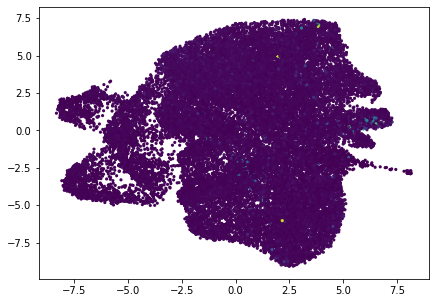

In [28]:
import umap

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1],  
            c = df_covid_for_nlp.body_word_count,
            s = 10, # size
            edgecolor='none'
            )
plt.show()